# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**

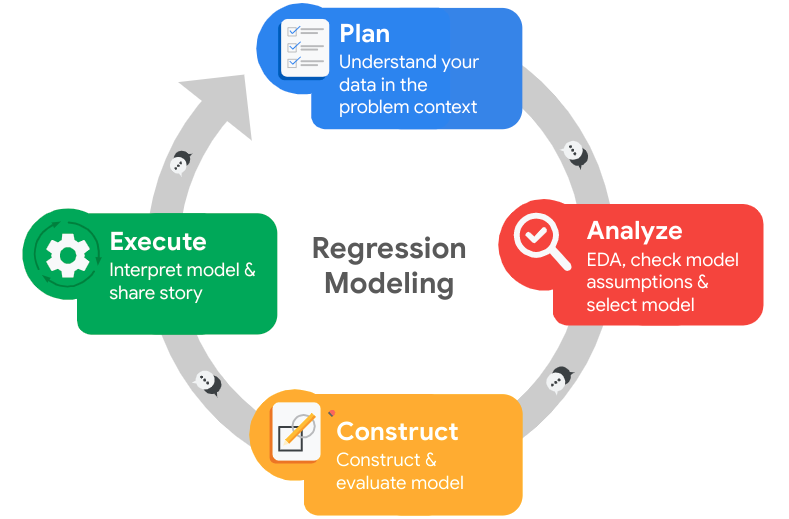

## **Pace: Plan**

### Understand the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Response

* The stakeholders for this project includes
    - Salifort's senior leadership team: They are responsible for setting the direction of the company
    - Salifort's Human Resource Department: They are responsible for conducting employee survey, collecting turn over data and implementing retention strategies
    - Employees: While not directly involved in the project, employees are indirectly affected by turnover rates and the company's efforts to improve retention. 
    - Other Stakeholders: This includes other data professional in my department whom I will be working with answer the business problem.

* What are you trying to solve question refers to what is the goal of this project? Which is to develop a predictive model that can anticipate employee turnover at Salifort Motors based on relevant data points such as job title, department, number of projects, and average monthly hours. 

* Initial observations of the data reveals no missing values in the data set. Additionally, there doesn't appear to be any data integrity issues or unreasonbale values in the any of the data points. Although, I find it interesting that performance and satisfaction levels value ranges from 0-1 (to be explored further)

* I find myself refering to my notebooks, online resources, library documentations, and other relevant resouces.

* Yes, I have some ethical consideration in this stage: 
    - Data privacy and security:
    - Bias and fairness: 
    - Anonymization and aggregation: Though this is an issue with the project as the data doesn't include PI's. However it is important to keep in mind.
    - Informed consent: If I am consulted in the designing surveys or collecting employee data, I must ensure that employees provide informed consent to participate in the survey and understand how their data will be used.
    - Transparency: To clearly state the methods and potential limitations of the model

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [19]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score


# logistic regression
from sklearn.linear_model import LogisticRegression

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For saving model
import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [32]:
# Load dataset into a dataframe
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Capstone_Project\\HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### Gather basic information about the data

In [36]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [39]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [44]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [46]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                        'Department': 'department',
						'average_montly_hours': 'average_monthly_hours',
						'time_spend_company': 'tenure'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [50]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

* The data does not contain any missing values.

### Check duplicates
Check for any duplicate entries in the data.

In [56]:
# Check for duplicates
df.duplicated().sum()

3008

3,008 rows contain duplicates.

In [61]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [75]:
print(f"Shape before dropping duplicate: {df.shape}")
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates()
print(f"Shape after dropping duplicate: {df1.shape}")
# Display first few rows of new dataframe as needed
df1.head()

Shape before dropping duplicate: (14999, 10)
Shape after dropping duplicate: (11991, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers
Check for outliers in the data.

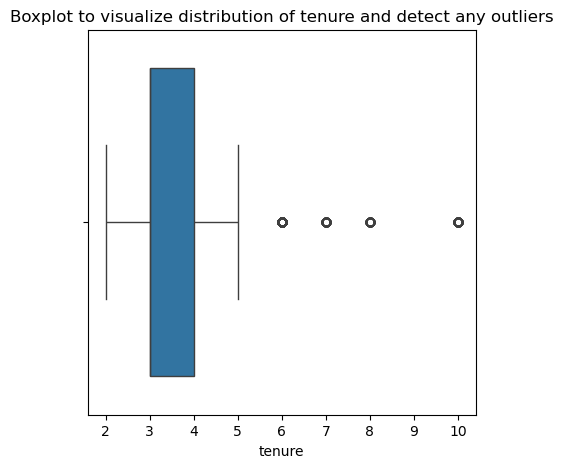

In [84]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,5))
plt.title("Boxplot to visualize distribution of tenure and detect any outliers")
sns.boxplot(data=df1, x="tenure")
plt.show()

The boxplot shows that there are outliers in `tenure`.

In [97]:
# Determine the number of rows containing outliers

# Compute the 25th and 75th percentile values in `tenure` 
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# compute interquartile range
iqr = percentile75 - percentile25

# compute upper and lower bounds
lower_bound = percentile25 - 1.5 * iqr
upper_bound = percentile75 + 1.5 * iqr
print(f"Lower limit: {lower_bound}")
print(f"Upper limit: {upper_bound}")
# identify outliers
df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)].shape

Lower limit: 1.5
Upper limit: 5.5


(824, 10)

There are 824 rows in the data containing outliers in `tenure`. 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Response

- There is no linear relationship between any of the variables. There does exist positive corrlation between average monthly hours, number of project and evaluation scores. Left variable and satisfaction levels are negatively correlaed.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [119]:
# Get numbers of people who left vs. stayed
num_of_people_who_left = df1["left"].value_counts()
print(f"The number of employees who left: {num_of_people_who_left[1]}")

# Get percentages of people who left vs. stayed
percent_left = df1["left"].value_counts(normalize=True)
print(f"The percentage of employees who left: {percent_left[1] * 100:.3}%")

The number of employees who left: 1991
The percentage of employees who left: 16.6%


The data is imbalanced, with 83.4% of employees staying and 16.6% of employees leaving.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

* What are the variables I am interested in?

`satisfaction_level`, `number_project`, `tenure`, `department`, `salary`, `average_monthly_hours`

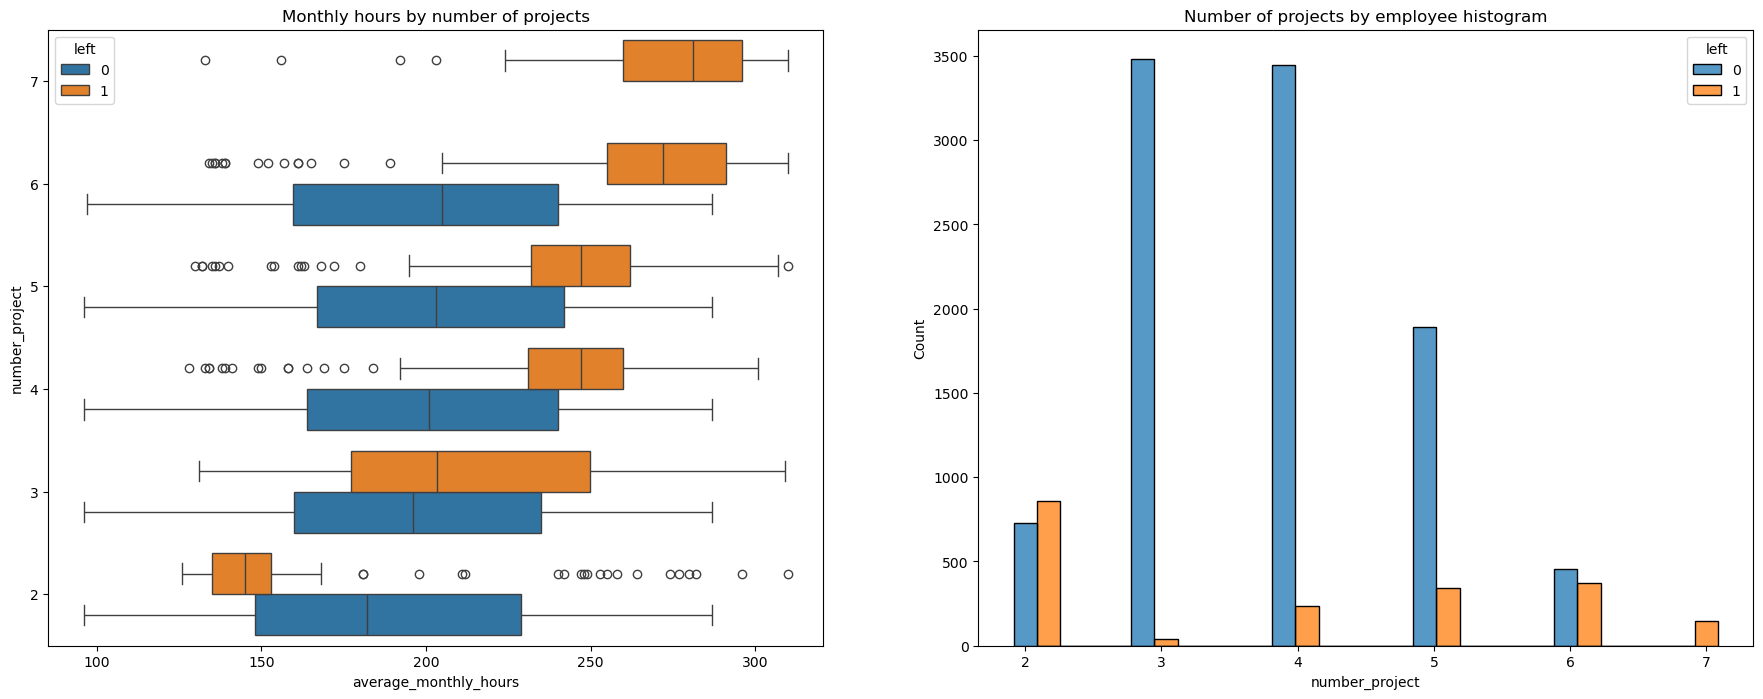

In [130]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Monthly hours by number of projects")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df1.loc[df1["left"] == 0, "number_project"]
tenure_left = df1.loc[df1["left"] == 1, "number_project"]
sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()


#### Insights :

- All employees with 7 `number_project` left the company.
- The optimal `number_project` for employees to stay seems to be 3. Both boxplot of `number_project` between employee who stayed and left are overlapping.
- With the assumption work week of 40 hours and two weeks of vacation per year,  the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

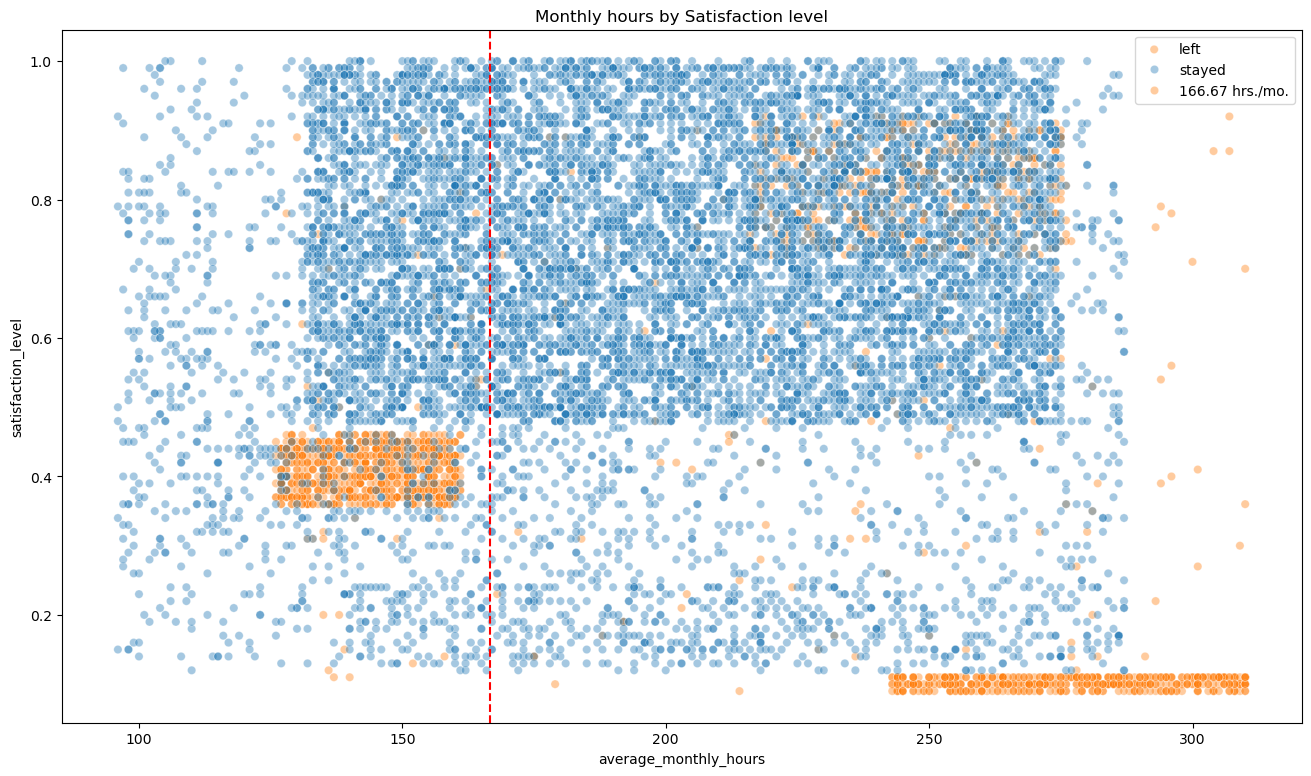

In [138]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", label="166.67 hrs./mo.", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Monthly hours by Satisfaction level");

#### Insights :

- There are group of employee who have normal working hours (~150 hours) and left the company and gave ~0.4 `satisfaction_level`.
- There are group of employee who have really high working hours (~250+ hours) and left the company and gave ~0.1 `satisfaction_level`.
- There are group of employee who have high working hours (~200 hours) and left the company and gave ~0.8 `satisfaction_level`.